In [2]:
import pandas as pd
import numpy as np

data=pd.read_csv(r'C:\Users\vmffl\workspace\우리은행 데이터경진대회 데이터셋\우리은행 데이터경진대회 데이터셋.csv',index_col=0)

for col_name in data.columns:
    data[col_name]=pd.Categorical(data[col_name])

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data,test_size=0.2, random_state=100)

X_trn=train_data.iloc[:,1:]
y_trn=train_data['TARGET']
X_tes=test_data.iloc[:,1:]
y_tes=test_data['TARGET']

from imblearn.over_sampling import SMOTEN
smoten = SMOTEN(random_state=1000)
X_trn_over, y_trn_over = smoten.fit_resample(X_trn,y_trn)

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve

def get_eval(y_test,pred=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    precision2=precision_score(y_test,pred,pos_label=0)
    recall2=recall_score(y_test,pred,pos_label=0)
    f1_2=f1_score(y_test,pred,pos_label=0)
    print("confusion matrix")
    print(confusion)
    print('accuracy : {0:.4f} , precision : {1:.4f} , recall : {2:.4f}, F1 score : {3:.4f} \n precision(0) : {4:.4f} , recall(0) : {5:.4f}, f1(0) : {6:.4f}'.format(accuracy,precision, recall,f1,precision2,recall2,f1_2))


In [3]:
from sklearn.ensemble import RandomForestClassifier

rdf_clf = RandomForestClassifier(random_state=1000)
rdf_clf.fit(X_trn, y_trn)
pred = rdf_clf.predict(X_tes)
get_eval(y_tes,pred)

confusion matrix
[[23742     9]
 [   83    73]]
accuracy : 0.9962 , precision : 0.8902 , recall : 0.4679, F1 score : 0.6134 
 precision(0) : 0.9965 , recall(0) : 0.9996, f1(0) : 0.9981


In [4]:
rdf_clf2 = RandomForestClassifier(random_state=1000)
rdf_clf2.fit(X_trn_over, y_trn_over)
pred2 = rdf_clf2.predict(X_tes)
get_eval(y_tes,pred2)

confusion matrix
[[23739    12]
 [   80    76]]
accuracy : 0.9962 , precision : 0.8636 , recall : 0.4872, F1 score : 0.6230 
 precision(0) : 0.9966 , recall(0) : 0.9995, f1(0) : 0.9981


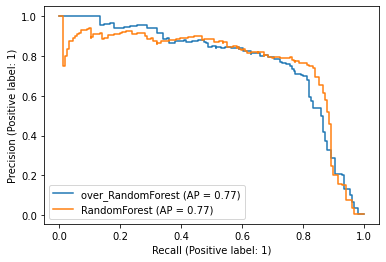

In [5]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_precision_recall_curve(rdf_clf2, X_tes, y_tes, ax = plt.gca(), name = "over_RandomForest")
plot_precision_recall_curve(rdf_clf, X_tes, y_tes,ax = plt.gca(),name = "RandomForest")

### 이전까지 해보았던 Naive Bayes, Logistic Regression에 비해 좋은 성능을 보임. 오버샘플링을 한 데이터와 하지 않은 데이터 간의 성능차이가 거의 없음.